In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
import monox as mx

In [4]:
train_data_fsr              =  mx.load_pkl_from_targz("./data/train_data_fsr.tar.gz","train_data_fsr.pkl")
test_data_fsr               =  mx.load_pkl_from_targz("./data/test_data_fsr.tar.gz","test_data_fsr.pkl")

# train_data_fsr_log          =  mx.load_pkl_from_targz("./data/train_data_fsr_log.tar.gz","train_data_fsr_log.pkl") # same thing but in log scale
# test_data_fsr_log           =  mx.load_pkl_from_targz("./data/test_data_fsr_log.tar.gz","test_data_fsr_log.pkl")   # same thing but in log scale 

# train_data_fsr_cleaned      =  mx.load_pkl_from_targz("./cleaned_data/train_data_fsr.tar.gz","train_data_fsr.pkl")         # same thing but i keep only data with bout 70% bins filled
# train_data_fsr_log_cleaned  =  mx.load_pkl_from_targz("./cleaned_data/train_data_fsr_log.tar.gz","train_data_fsr_log.pkl") # same thing but i keep only data with bout 70% bins filled, log scale

# Visualize Dataset

A. Data / Input (What you expect to see in experiment) : 
- MET : missing transverse energy
- PT(j[1]) : transverse momentum of leading jet
- ETA(j[1]) : pseudorapidity of leading jet

B. Output (What you are trying to infer) : 
- MASS : Mass of Dark Matter
- COUP : Coupling Between Dark Matter and the Mediator

C. Auxiliary Inputs (Not used in your project, and they should be same/similar for every row in this dataset)<br> 
Cuts: 
- MET_CUT : Minimum Missing Transverse Energy
- PT(j[1])_CUT : Minimum transverse momentum of leading jet
- ETA(j[1])_CUT : Maximum Absolute pseudorapidity of leading jet<br>

Range: 
- PT(j[1])_LOW : lower limit of PT histograms    
- PT(j[1])_UP : upper limit of PT histograms 
- MET_LOW : lower limit of MET histograms    
- MET_UP : upper limit of MET histograms 
- ETA(j[1])_LOW : lower limit of ETA histograms (without the negative)   
- ETA(j[1])_UP : upper limit of ETA histograms <br>

Number of Events: 
- PT(j[1])_NEVENTS : total number of events in the PT histogram
- MET_NEVENTS : total number of events in the MET histogram
- ETA(j[1])_NEVENTS : total number of events in the ETA histogram



In [5]:
display(train_data_fsr)


,PT(j[1]),PT(j[1])_NEVENTS,MET,MET_NEVENTS,ETA(j[1]),ETA(j[1])_NEVENTS,MASS,COUP,MET_CUT,PT(j[1])_CUT,ETA(j[1])_CUT,PT(j[1])_LOW,PT(j[1])_UP,MET_LOW,MET_UP,ETA(j[1])_LOW,ETA(j[1])_UP
0,"[1592620.6366810626, 538956.02334533, 168786.8...",2.419415e+06,"[1622382.668014396, 519973.07134533, 161944.12...",2.419415e+06,"[36.788666666666664, 404.6753333333333, 2354.4...",2.419415e+06,487,0.183,120,120,4.5,120,1500,120,1500,4.5,4.5
1,"[1577941.5473453298, 539139.9666786633, 173496...",2.408269e+06,"[1612302.5733477292, 514307.2053429306, 168014...",2.408269e+06,"[0.0, 441.46399999999994, 1802.6446666666666, ...",2.408269e+06,487,0.183,120,120,4.5,120,1500,120,1500,4.5,4.5
2,"[1579633.8208958805, 538219.8345833711, 168345...",2.406467e+06,"[1611272.0742292139, 515153.3405833711, 163489...",2.406467e+06,"[0.0, 441.46399999999994, 1802.6446666666666, ...",2.406467e+06,487,0.183,120,120,4.5,120,1500,120,1500,4.5,4.5
3,"[1584710.6620119964, 539507.0306738646, 168566...",2.406392e+06,"[1619145.2653477292, 515152.52200479864, 16146...",2.406392e+06,"[0.0, 404.6753333333333, 1913.0106666666666, 6...",2.406392e+06,487,0.183,120,120,4.5,120,1500,120,1500,4.5,4.5
4,"[1575917.3480071977, 535828.9866786633, 171913...",2.398594e+06,"[1611271.2566738646, 509892.97667866334, 16507...",2.398594e+06,"[0.0, 588.6186666666666, 1765.8559999999998, 6...",2.398594e+06,487,0.183,120,120,4.5,120,1500,120,1500,4.5,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,"[1577502.9746244326, 534162.9733791704, 172910...",2.402748e+06,"[1608350.9059346754, 514429.5507885138, 165890...",2.402748e+06,"[36.788666666666664, 441.46399999999994, 1839....",2.402748e+06,77,0.456,120,120,4.5,120,1500,120,1500,4.5,4.5
6,"[1594783.6255180573, 533557.9543566164, 172456...",2.417231e+06,"[1625810.0333763375, 513508.011860082, 165247....",2.417231e+06,"[36.78866666666667, 257.52066666666667, 2244.1...",2.417231e+06,77,0.456,120,120,4.5,120,1500,120,1500,4.5,4.5
7,"[1580847.0987675688, 529937.7434977995, 170765...",2.403660e+06,"[1609375.5218160462, 510977.7940380256, 165470...",2.403660e+06,"[0.0, 478.25266666666664, 2096.9539999999997, ...",2.403660e+06,77,0.456,120,120,4.5,120,1500,120,1500,4.5,4.5
8,"[1592144.863957766, 540583.6785590668, 171617....",2.423185e+06,"[1623795.768018497, 518187.4615738097, 166894....",2.423185e+06,"[36.788666666666664, 294.3093333333333, 2096.9...",2.423185e+06,77,0.456,120,120,4.5,120,1500,120,1500,4.5,4.5


## Mass and coupling possibilities in the dataset

Total Data Size: 17840
Unique MASS-COUP Combinations: 223


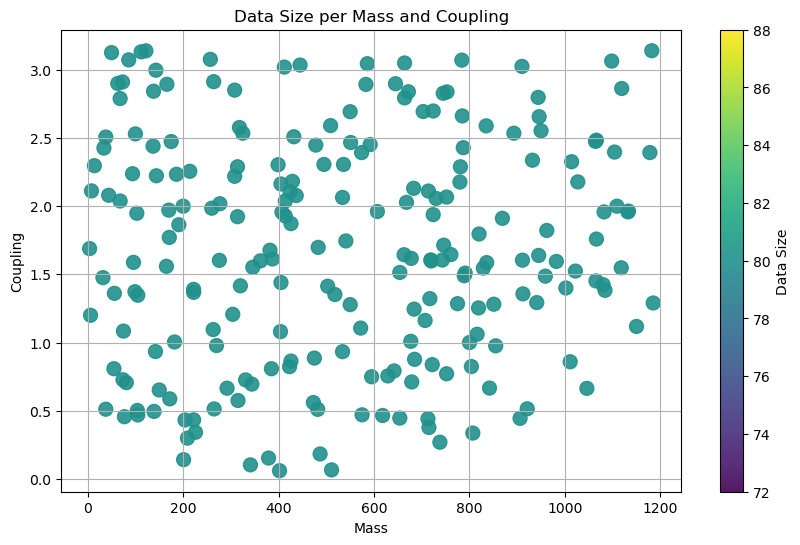

In [6]:
mx.plot_distribution(train_data_fsr)

Total Data Size: 10480
Unique MASS-COUP Combinations: 131


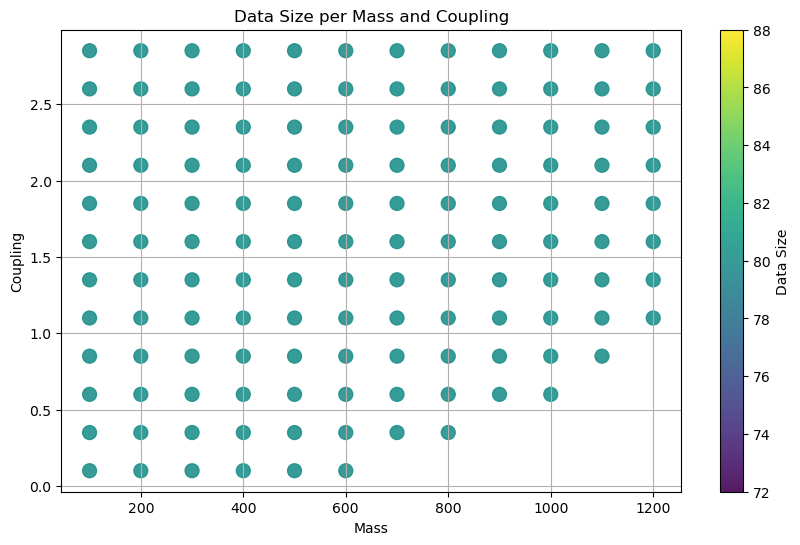

In [7]:
mx.plot_distribution(test_data_fsr)

Remark: 
- Its expensive to simulate many events for each mass-coupling parameter space point. 
- So I use data augmentation to get more histogram from each data point. (You can sample from the same amount of events to build different histogram)  
- Datasize means how many histogram you have with that mass-coupling parameter space point

## Number of Signal events 

In [8]:
xsecpd = pd.read_csv("./xsec.csv")
xsecpd["nevents"] = xsecpd["xsec(pb)"]*139*1000
display(xsecpd)


,coup,mass,xsec(pb),nevents
0,2.000,200.000,7.995447,1.111367e+06
1,1.000,800.000,0.000107,1.487891e+01
2,1.911,869.391,0.000221,3.068981e+01
3,1.864,191.200,7.117796,9.893736e+05
4,1.368,222.942,3.479818,4.836948e+05
...,...,...,...,...
218,1.278,550.413,0.002992,4.158207e+02
219,2.289,314.211,6.364299,8.846376e+05
220,0.433,222.030,0.349649,4.860127e+04
221,2.448,478.577,0.410783,5.709882e+04


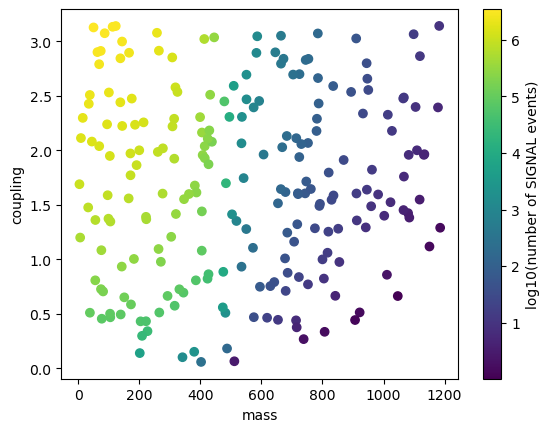

In [9]:
plt.scatter(xsecpd["mass"], xsecpd["coup"],c=np.log10(xsecpd["nevents"]),)
plt.xlabel("mass")
plt.ylabel("coupling")
plt.colorbar(label="log10(number of SIGNAL events)")
plt.show()

Remarks : The number events gets lower with lower couplings and higher mass

# Example histograms

In [10]:
PT_LOW   = (train_data_fsr["PT(j[1])_LOW"].unique())[0]
PT_UP    = (train_data_fsr["PT(j[1])_UP"].unique())[0]
MET_LOW  = (train_data_fsr["MET_LOW"].unique())[0]
MET_UP   = (train_data_fsr["MET_UP"].unique())[0]
ETA_LOW  = (train_data_fsr["ETA(j[1])_LOW"].unique())[0]
ETA_UP   = (train_data_fsr["ETA(j[1])_UP"].unique())[0]


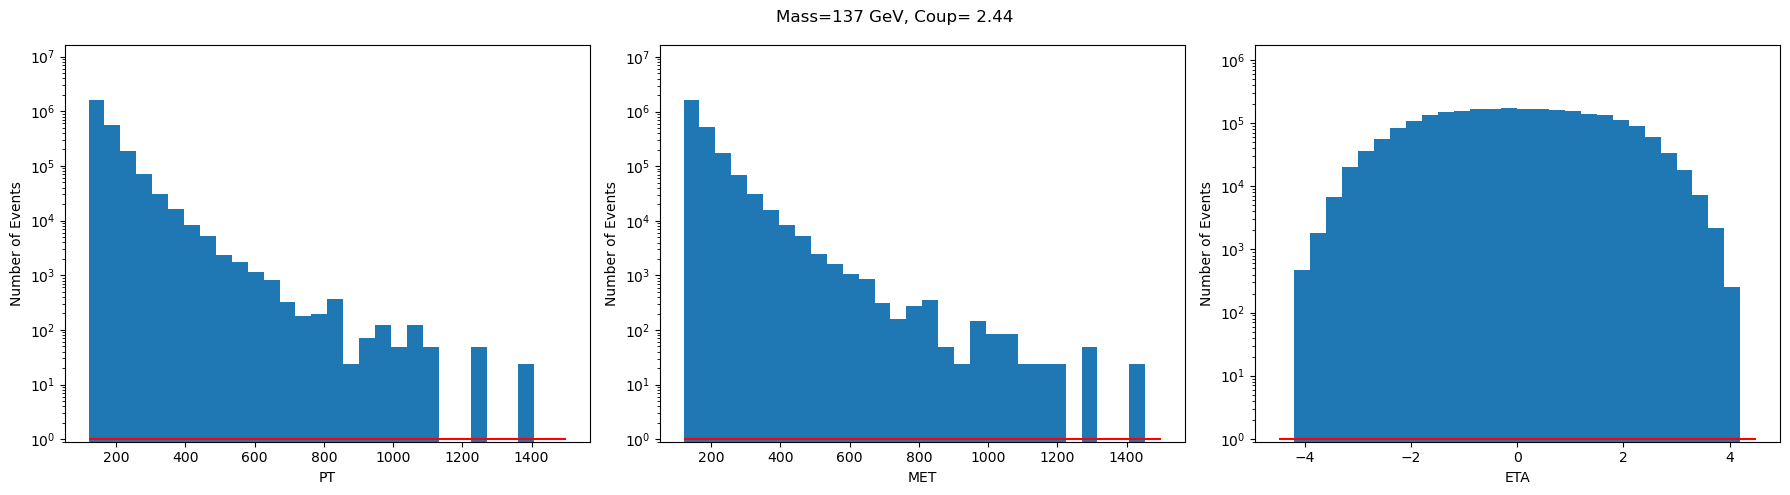

In [11]:
# Randomly sample a data point
dat = train_data_fsr.sample(1)

# Create figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# PT plot
bin_edges = np.linspace(PT_LOW, PT_UP, 31)
bin_centers = np.diff(bin_edges) / 2 + bin_edges[:-1]
axes[0].bar(bin_centers, dat["PT(j[1])"].values[0], width=np.diff(bin_edges), 
            label=f"Mass={dat['MASS'].values[0]} GeV, Coup= {dat['COUP'].values[0]}")
axes[0].hlines(1, PT_LOW, PT_UP, color="r")
axes[0].set_yscale("log")
axes[0].set_ylim(0.9, 10 * max(dat["PT(j[1])"].values[0]))
axes[0].set_xlabel("PT")
axes[0].set_ylabel("Number of Events")
#axes[0].legend()

# MET plot
bin_edges = np.linspace(MET_LOW, MET_UP, 31)
bin_centers = np.diff(bin_edges) / 2 + bin_edges[:-1]
axes[1].bar(bin_centers, dat["MET"].values[0], width=np.diff(bin_edges), 
            label=f"Mass={dat['MASS'].values[0]} GeV, Coup= {dat['COUP'].values[0]}")
axes[1].hlines(1, MET_LOW, MET_UP, color="r")
axes[1].set_yscale("log")
axes[1].set_ylim(0.9, 10 * max(dat["MET"].values[0]))
axes[1].set_xlabel("MET")
axes[1].set_ylabel("Number of Events")
#axes[1].legend()

# ETA plot
bin_edges = np.linspace(-ETA_LOW, ETA_UP, 31)
bin_centers = np.diff(bin_edges) / 2 + bin_edges[:-1]
axes[2].bar(bin_centers, dat["ETA(j[1])"].values[0], width=np.diff(bin_edges), 
            label=f"Mass={dat['MASS'].values[0]} GeV, Coup= {dat['COUP'].values[0]}")
axes[2].hlines(1, -ETA_LOW, ETA_UP, color="r")
axes[2].set_yscale("log")
axes[2].set_ylim(0.9, 10 * max(dat["ETA(j[1])"].values[0]))
axes[2].set_xlabel("ETA")
axes[2].set_ylabel("Number of Events")
#axes[2].legend()
plt.suptitle(f"Mass={dat['MASS'].values[0]} GeV, Coup= {dat['COUP'].values[0]}")
# Adjust layout
plt.tight_layout()
plt.show()

Remarks : 
- Note that PT and MET looks very similar (Because of conservation of momentum)
- Simulated data gets more noisy as it goes to higher value of MET or PT. 
- Probablility of generating such events gets lower 
- Similar to the probability of finding them in experiments
- Also, It becomes more computationally difficult to simulate


### Compare different data points

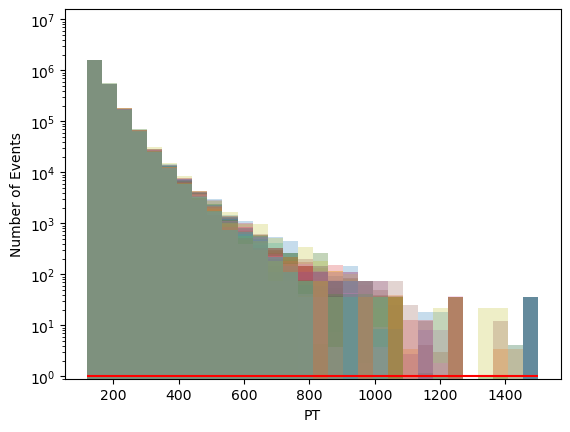

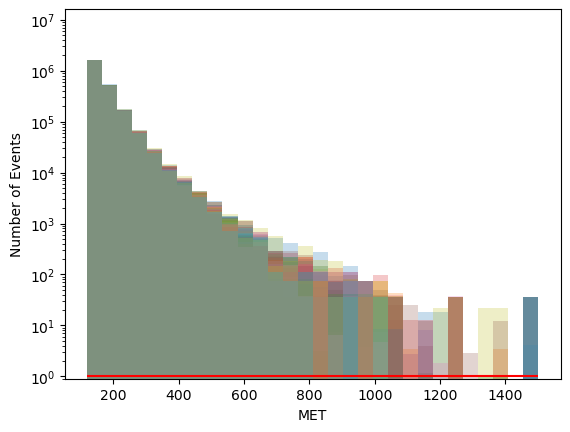

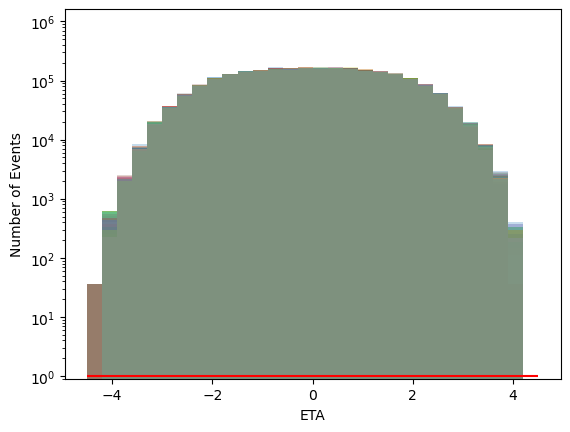

In [12]:
xdat = train_data_fsr.sample(50)
bin_edges = np.linspace(PT_LOW, PT_UP,31)
bin_centers = np.diff(bin_edges) / 2 + bin_edges[:-1]
for _, dat in xdat.iterrows():
    plt.bar(bin_centers, dat["PT(j[1])"],width=np.diff(bin_edges),label=f"Mass={dat['MASS']} GeV, Coup= { dat['COUP']}",alpha=0.25)
plt.hlines(1, PT_LOW, PT_UP,color="r")
plt.yscale("log")
plt.ylim(0.9,10*max(dat["PT(j[1])"]))
plt.xlabel("PT")
plt.ylabel("Number of Events")
plt.show()

bin_edges = np.linspace(MET_LOW, MET_UP,31)
bin_centers = np.diff(bin_edges) / 2 + bin_edges[:-1]
for _, dat in xdat.iterrows():
     plt.bar(bin_centers, dat["MET"],width=np.diff(bin_edges),label=f"Mass={dat['MASS']} GeV, Coup= { dat['COUP']}",alpha=0.25)
plt.hlines(1, PT_LOW, PT_UP,color="r")
plt.yscale("log")
plt.ylim(0.9,10*max(dat["MET"]))
plt.xlabel("MET")
plt.ylabel("Number of Events")
plt.show()

bin_edges = np.linspace(-ETA_LOW, ETA_UP,31)
bin_centers = np.diff(bin_edges) / 2 + bin_edges[:-1]
for _, dat in xdat.iterrows():
    plt.bar(bin_centers, dat["ETA(j[1])"],width=np.diff(bin_edges),label=f"Mass={dat['MASS']} GeV, Coup= { dat['COUP']}",alpha=0.25)
plt.hlines(1, -ETA_LOW, ETA_UP,color="r")
plt.yscale("log")
plt.ylim(0.9,10*max(dat["ETA(j[1])"]))
plt.xlabel("ETA")
plt.ylabel("Number of Events")
plt.show()


Remark: you can see all the slight difference between data points